# 머신러닝 맛보기

## Scikit-Learn

- 파이썬 기반 머신러닝 라이브러리
- 사이킷런 이라고 발음

## 회귀

- 연속형 데이터를 가지고 학습
- 선형회귀의 경우 학습 데이터를 통해 1차 회귀식을 학습 (y = ax + b)
- 실제값과 예측값의 오차를 줄이는 방향으로 학습

### 예시) 보스턴 집 값 예측

In [ ]:
# scikit-learn 1.1버전으로 다운그레이드
# 사유) load_boston이 1.2버전에서 삭제됨
!pip uninstall scikit-learn
!pip install scikit-learn==1.1.0

In [124]:
import xgboost as xgb
model = xgb.XGBRegressor()

In [1]:
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.datasets import load_boston # boston 데이터셋
from sklearn.model_selection import train_test_split # 학습, 테스트 데이터 분리

In [ ]:
# load_boston() 함수를 호출하여 데이터를 가져옴
data_boston = load_boston()
data_boston

In [4]:
type(data_boston)

sklearn.utils._bunch.Bunch

In [ ]:
# 데이터셋의 DESCR(설명) 출력
print(data_boston.DESCR)

In [6]:
# 보스턴 데이터의 키들
data_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [70]:
data_boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
# input value : data_boston.data (독립변수)
data_boston.data.shape

(506, 13)

In [9]:
# target value : data_boston.target (종속변수 - 예측할 대상, 타겟칼럼)
data_boston.target.shape

(506,)

## 데이콘 데이터 로드

- pandas
- numpy

In [58]:
import pandas as pd
import numpy as np

In [59]:
# 학습을 위한 데이터 로드
boston_df = pd.read_csv('./train.csv')

In [61]:
# 검증을 위한 데이터 로드
test_df = pd.read_csv('./test.csv')

In [67]:
# 데이터프레임의 칼럼 확인
boston_df.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [94]:
# 내가 학습에 사용할 Feature - 칼럼을 선택해서 가져온다.
train_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_columns = 'MEDV'

# 해당 칼럼들만 가지고 있는 데이터프레임을 numpy.ndarray 객체로 변환
type(boston_df[train_columns].values)

numpy.ndarray

In [95]:
train_data = boston_df[train_columns].values
target = boston_df[target_columns].values # MEDV

In [77]:
test_df[train_columns].values.shape

(51, 13)

In [34]:
# train_test_split 데이터를 학습용, 테스트용으로 분리 (독립변수 먼저 넣어주고, 종속변수를 넣어줌)
X_train, X_test, y_train, y_test = train_test_split(data_boston.data, data_boston.target, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [96]:
# for Dacon (데이터프레임으로 split, ndarray로 split)
# X_train, X_test, y_train, y_test = train_test_split(boston_df[train_columns], boston_df[target_columns], test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((409, 13), (46, 13), (409,), (46,))

In [12]:
# train_size 기본값은 75% 정도
379/506

0.7490118577075099

In [127]:
# 1번. 모델 호출
# model = LinearRegression()
model = xgb.XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
model.coef_

AttributeError: ignored

In [40]:
LinearRegression?

In [128]:
# 2번. 모델 학습
# model.fit(data_boston.data, data_boston.target)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [134]:
model.n_estimators

100

In [142]:
import matplotlib.pyplot as plt

In [143]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

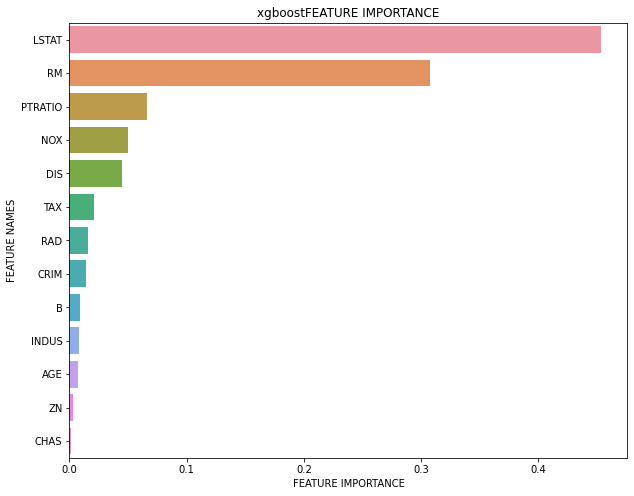

In [146]:
import seaborn as sns

plot_feature_importance(model.feature_importances_, train_columns, 'xgboost')
# sns.barplot()

In [131]:
# 3번. 학습결과 확인
# y = ax+b 의 a (계수)
model.coef_

AttributeError: ignored

In [121]:
# y = ax+b에서 b (y절편)
model.intercept_

36.62103575298731

In [129]:
model.score(X_train, y_train)

0.9999959439168699

In [130]:
# 4번. 모델 검증
# model.score(data_boston.data, data_boston.target)
model.score(X_test, y_test)

0.9091089773494977

In [113]:
# 전체 데이터에 대해서 학습
model.fit(train_data, target)

LinearRegression()

In [114]:
model.score(train_data, target)

0.742148138830942

## 예측, 제출

- test_df로 예측 model.predict() 메서드
- sample_submission.csv < 넣어서 제출

In [115]:
test_data = test_df[train_columns].values

y_pred = model.predict(test_data)

In [116]:
y_pred

array([24.84995763, 34.34366488, 19.54515666, 24.40395622, 25.79397949,
       31.10412607, 16.59715016, 13.61033762, 25.16233507, 22.54531253,
       11.36007719, 27.48558315, 30.45481699, 21.49464281, 37.19709599,
       15.22174006, 20.34285838, 29.86841675, 20.32972553, 31.05395458,
       19.49808715, 13.59664009, 25.46373714, 33.56323499, 19.86634001,
       24.75752633, 20.15871559, 19.29375755, 24.33375492, 17.82931793,
        3.29391541, 32.18207858, 37.1103706 , 21.15133603, 25.47565466,
       20.77966278, 16.87008175, 24.68217147, 20.16310696, 27.38884823,
       18.4940673 , 18.02175722, 13.63482228,  0.75537043, 21.70179793,
       19.66542137, 10.13335802, 40.96127754, 24.47675604, 16.7351362 ,
       33.05253592])

In [117]:
submission_df = pd.read_csv('./sample_submission.csv')

In [ ]:
submission_df

In [119]:
# MEDV 칼럼에 예측한 값을 넣기
submission_df['MEDV'] = y_pred

In [120]:
# 제출파일 생성
submission_df.to_csv('./my_submission.csv', index=None)

In [ ]:
# y = ax + b

# y <- 우리가 예측할 집 값 (y_train << 정답 값)
# a, b를 찾아나가는 과정 < 학습